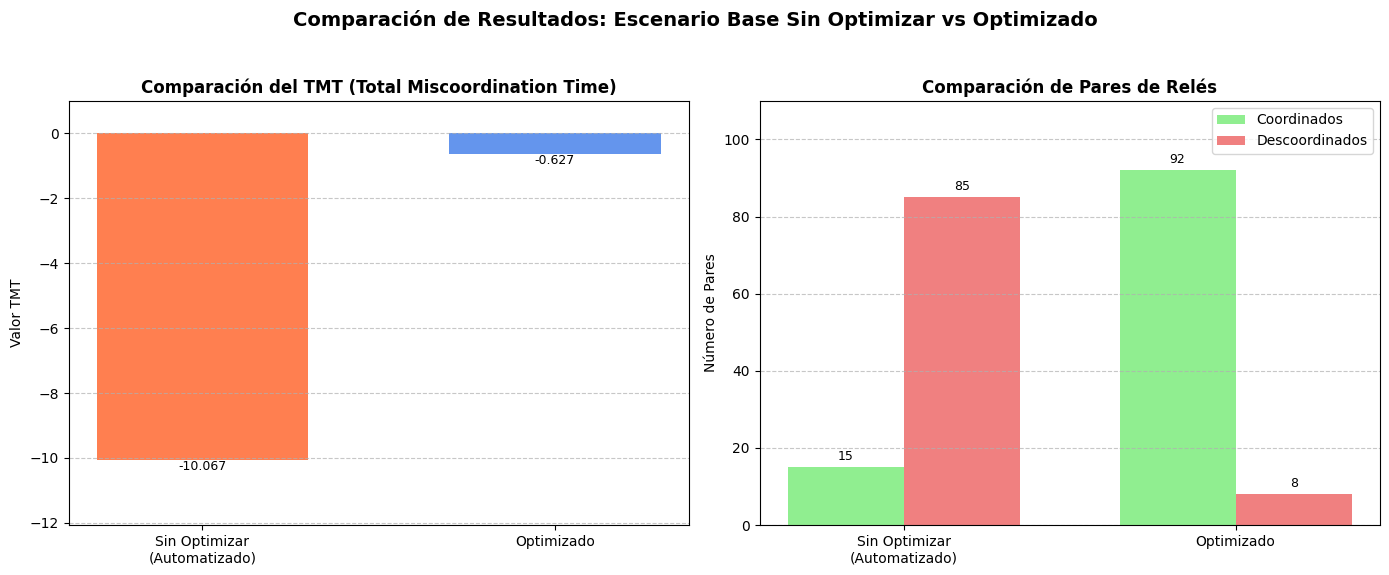

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- Datos ---
escenarios = ['Sin Optimizar\n(Automatizado)', 'Optimizado']
tmt_valores = [-10.067, -0.627]
coord_valores = [15, 92]          # Pares Coordinados
descoord_valores = [85, 8]        # Pares Descoordinados
total_pares = 100

# --- Creación de la Gráfica ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6)) # 1 fila, 2 columnas

# Gráfico 1: Comparación TMT
bars_tmt = axs[0].bar(escenarios, tmt_valores, color=['#FF7F50', '#6495ED'], width=0.6) # Coral, CornflowerBlue
axs[0].set_title('Comparación del TMT (Total Miscoordination Time)', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Valor TMT', fontsize=10)
axs[0].set_ylim(min(tmt_valores) - 2, 1) # Ajustar límite para visibilidad
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].tick_params(axis='x', labelsize=10)

# Añadir etiquetas de valor para TMT
for bar in bars_tmt:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom' if yval >=0 else 'top', ha='center', fontsize=9)

# Gráfico 2: Comparación Pares Coordinados/Descoordinados
x = np.arange(len(escenarios))  # Posiciones de las etiquetas [0, 1]
width = 0.35  # Ancho de las barras

rects1 = axs[1].bar(x - width/2, coord_valores, width, label='Coordinados', color='#90EE90') # LightGreen
rects2 = axs[1].bar(x + width/2, descoord_valores, width, label='Descoordinados', color='#F08080') # LightCoral

# Añadir etiquetas, título y leyenda
axs[1].set_title('Comparación de Pares de Relés', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Número de Pares', fontsize=10)
axs[1].set_xticks(x)
axs[1].set_xticklabels(escenarios, fontsize=10)
axs[1].set_ylim(0, total_pares + 10) # Límite hasta el total + margen
axs[1].legend(fontsize=10)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Función para añadir etiquetas de valor a las barras de conteo
def autolabel(rects, ax):
    """Añade etiquetas de valor sobre las barras."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de offset vertical
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1, axs[1])
autolabel(rects2, axs[1])

# --- Finalizar y Mostrar ---
fig.suptitle('Comparación de Resultados: Escenario Base Sin Optimizar vs Optimizado', fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para el supertítulo
plt.show()